In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
df=pd.read_csv("relationship_comments_22.csv",sep=";",index_col=[0])

In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 9503


# General EDA

In [6]:
df.head()

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable
0,[],False,NaN,Archer2795,1.581028e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0,[],NaN,NaN,NaN
1,[],False,NaN,floridorito,1.590522e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0,[],NaN,NaN,NaN
2,[],False,NaN,testingtesting86,1.650500e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0,[],NaN,NaN,NaN
3,[],False,NaN,NerdYogi,1.512931e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0,[],NaN,NaN,NaN
4,[],False,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0,[],NaN,NaN,NaN


In [7]:
df.tail()

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable
145572,[],False,NaN,Wellwellwelllooky,1.657479e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0,[],NaN,NaN,NaN
145573,[],False,NaN,Flower-of-Telperion,1.551310e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0,[],NaN,NaN,NaN
145574,[],False,NaN,Tequila_Heineken,1.505648e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0,[],NaN,NaN,NaN
145575,[],False,NaN,103_with_reddit_ref,1.644850e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0,[],NaN,NaN,NaN
145576,[],False,NaN,After_Difficulty5459,1.661145e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0,[],NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145577 entries, 0 to 145576
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   all_awardings                    145577 non-null  object 
 1   archived                         145577 non-null  bool   
 2   associated_award                 0 non-null       float64
 3   author                           145577 non-null  object 
 4   author_created_utc               126730 non-null  float64
 5   author_flair_background_color    0 non-null       float64
 6   author_flair_css_class           0 non-null       float64
 7   author_flair_richtext            126960 non-null  object 
 8   author_flair_template_id         0 non-null       float64
 9   author_flair_text                0 non-null       float64
 10  author_flair_text_color          18617 non-null   object 
 11  author_flair_type                126960 non-null  object 
 12  au

In [9]:
df.isnull().sum() 

all_awardings                           0
archived                                0
associated_award                   145577
author                                  0
author_created_utc                  18847
author_flair_background_color      145577
author_flair_css_class             145577
author_flair_richtext               18617
author_flair_template_id           145577
author_flair_text                  145577
author_flair_text_color            126960
author_flair_type                   18617
author_fullname                     18617
author_patreon_flair                18617
author_premium                      18617
body                                    0
can_gild                                0
collapsed                               0
collapsed_because_crowd_control    145577
collapsed_reason                   143315
collapsed_reason_code              127053
comment_type                       145577
controversiality                        0
created_utc                       

In [10]:
df.columns

Index(['all_awardings', 'archived', 'associated_award', 'author',
       'author_created_utc', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'body', 'can_gild',
       'collapsed', 'collapsed_because_crowd_control', 'collapsed_reason',
       'collapsed_reason_code', 'comment_type', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'locked', 'name', 'no_follow', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'score_hidden', 'send_replies',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'top_awarded_type', 'total_awards_received',
       'treatment_tags', 'unrepliable_reason', 'author_cakeday', 'editable'],
      dtype='obje

In [11]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,collapsed_because_crowd_control,comment_type,controversiality,created_utc,gilded,retrieved_on,score,top_awarded_type,total_awards_received,unrepliable_reason
count,0.0,1.267300e+05,0.0,0.0,0.0,0.0,0.0,0.0,145577.000000,1.455770e+05,145577.000000,1.455770e+05,145577.000000,0.0,145577.000000,0.0
mean,NaN,1.531684e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.029826,1.668558e+09,0.000364,1.671072e+09,10.307226,NaN,0.003950,NaN
std,NaN,1.166362e+08,NaN,NaN,NaN,NaN,NaN,NaN,0.170108,7.499495e+05,0.020467,3.995879e+05,64.188953,NaN,0.087506,NaN
min,NaN,1.127707e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.667261e+09,0.000000,1.667841e+09,-365.000000,NaN,0.000000,NaN
25%,NaN,1.448616e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.667916e+09,0.000000,1.671087e+09,1.000000,NaN,0.000000,NaN
50%,NaN,1.566078e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.668561e+09,0.000000,1.671119e+09,1.000000,NaN,0.000000,NaN
75%,NaN,1.628383e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.669191e+09,0.000000,1.671155e+09,5.000000,NaN,0.000000,NaN
max,NaN,1.669848e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.669853e+09,3.000000,1.671190e+09,4879.000000,NaN,9.000000,NaN


# One Feature EDA

# Controversialty

0    141235
1      4342
Name: controversiality, dtype: int64


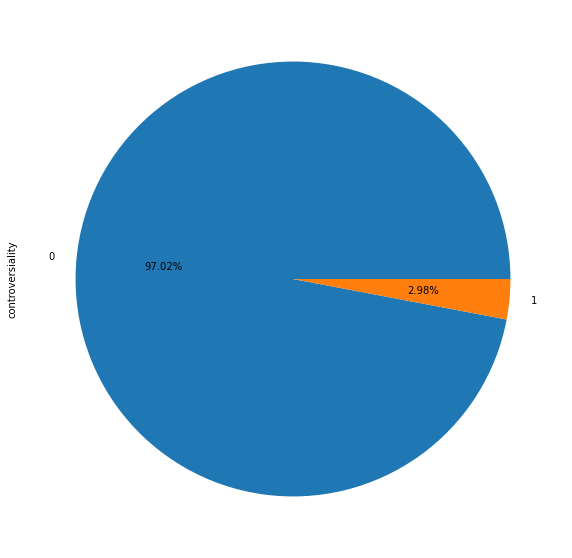

In [12]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Converting Controversialty values and deleting unimportant rows

In [13]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')

In [14]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

0    141235
1      4342
Name: controversiality, dtype: int64


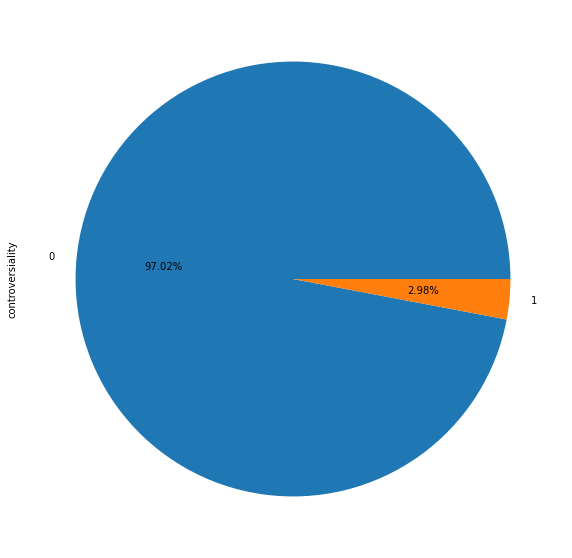

In [15]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

False    145577
Name: stickied, dtype: int64


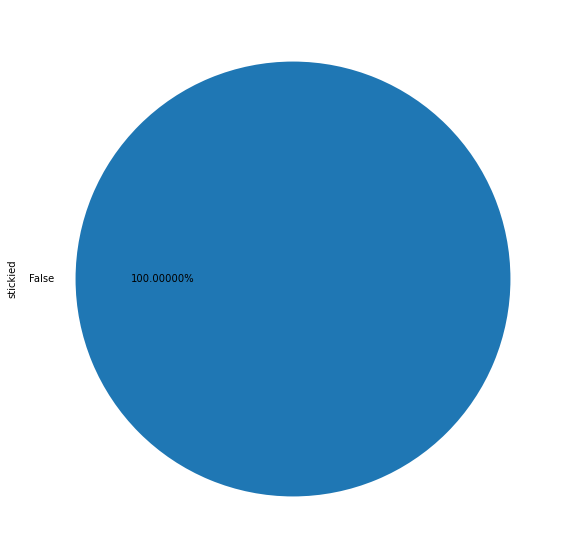

In [16]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [17]:
df["stickied"].unique()

array([False])

In [18]:
df[df['stickied'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable


In [19]:
df['stickied'] = df['stickied'].replace(False, "0")

In [20]:
df["stickied"].unique()

array(['0'], dtype=object)

0    145577
Name: stickied, dtype: int64


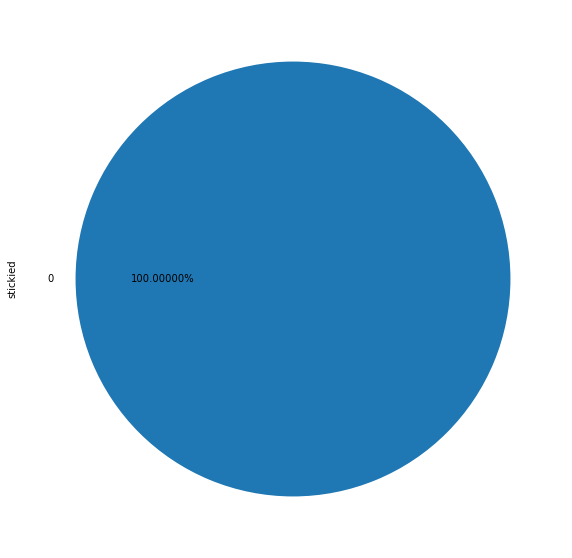

In [21]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

# link_id

t3_z4m4ip    774
t3_z1zhk2    652
t3_yr0blf    650
t3_yvfuxl    594
t3_yiqvxx    583
            ... 
t3_yt6633      1
t3_yt6cnh      1
t3_yt6cqd      1
t3_wtfqqh      1
t3_z963kt      1
Name: link_id, Length: 17342, dtype: int64


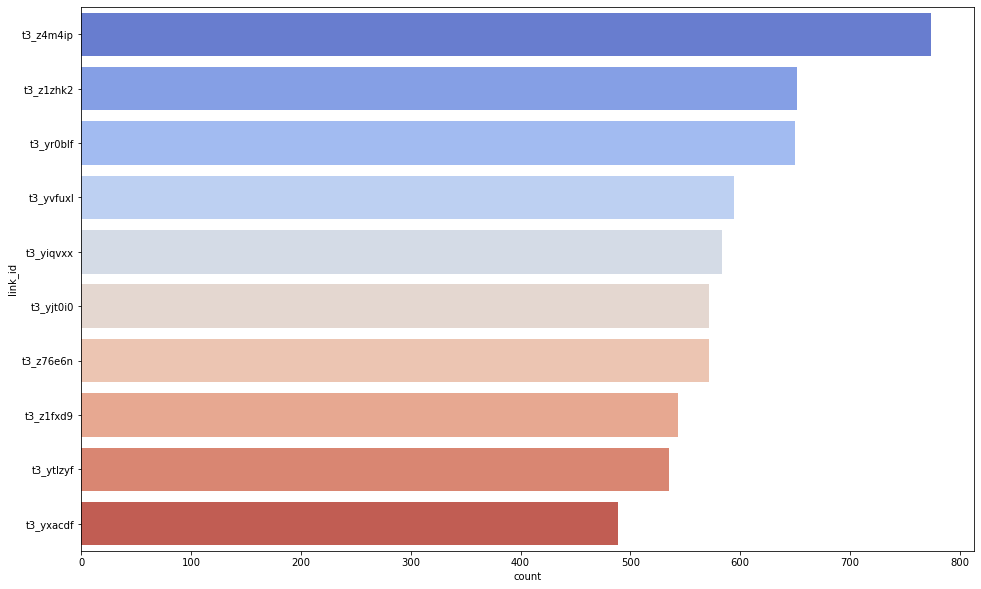

In [22]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [23]:
df[df['link_id'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable


# Subreddit_id

t5_2qjvn    145577
Name: subreddit_id, dtype: int64


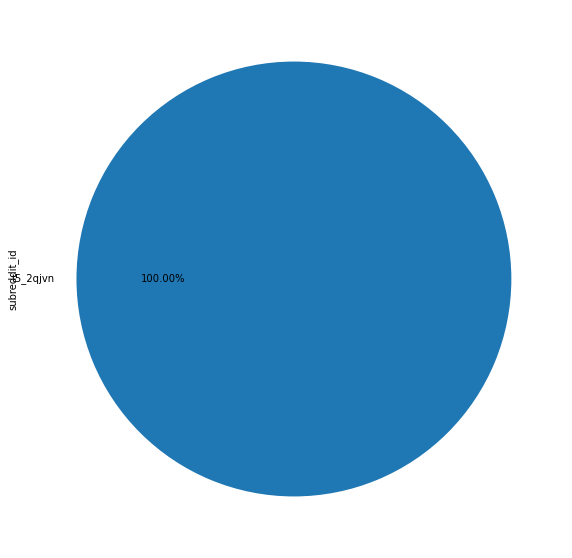

In [24]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

# Author

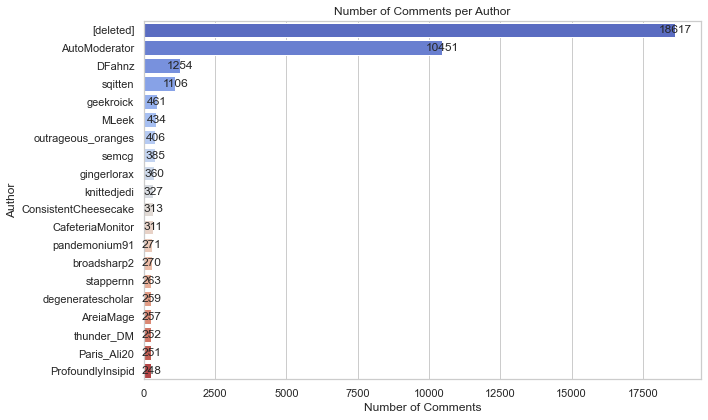

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [26]:
 df[df['author'].str.contains('AutoModerator')]["body"]

14        The above submission has been **removed** beca...
16        The above submission has been **removed** beca...
20        The above submission has been **removed** beca...
21        The above submission has been **removed** beca...
30        Rule 4 We do not allow terminology which is ge...
                                ...                        
145467    The above submission has been **removed** beca...
145518    The above submission has been **removed** beca...
145527    The above submission has been **removed** beca...
145536    The above submission has been **removed** beca...
145537    The above submission has been **removed** beca...
Name: body, Length: 10451, dtype: object

# Alle AutoModeratoren löschen

In [27]:
df=df.drop(df[df['author'].str.contains('AutoModerator')].index)

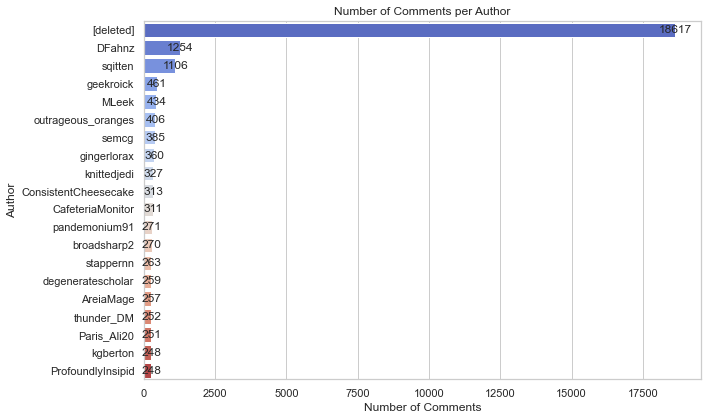

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

# Author flair text

In [42]:
df['author_flair_text'].fillna('0', inplace=True)

0    135126
Name: author_flair_text, dtype: int64


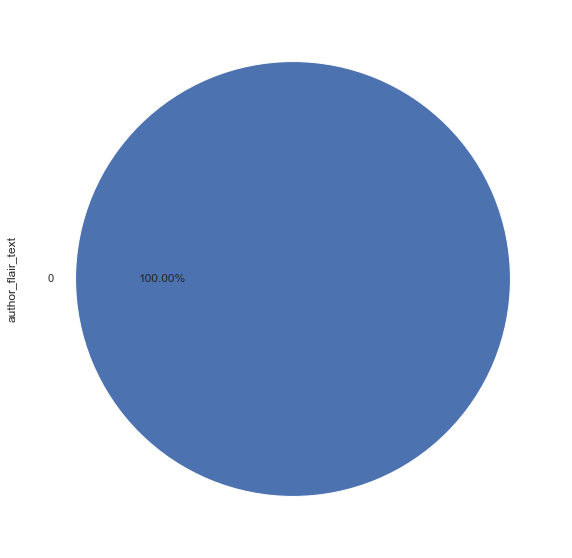

In [43]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationships    135126
Name: subreddit, dtype: int64


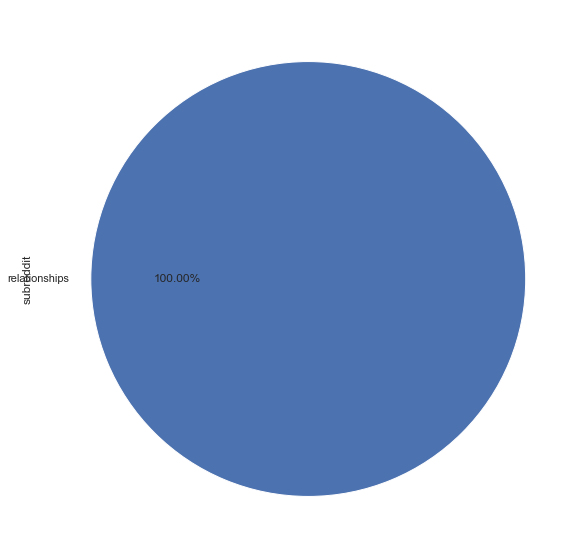

In [44]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [45]:
df[df['subreddit'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable,created_hour,created_day,created_year


# Created_utc

In [46]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [47]:
df['created_utc']

0        2022-11-01 00:00:24
1        2022-11-01 00:00:25
2        2022-11-01 00:00:26
3        2022-11-01 00:00:54
4        2022-11-01 00:01:23
                 ...        
145572   2022-11-30 23:59:19
145573   2022-11-30 23:59:27
145574   2022-11-30 23:59:34
145575   2022-11-30 23:59:43
145576   2022-11-30 23:59:49
Name: created_utc, Length: 135126, dtype: datetime64[ns]

In [48]:
df[df['created_utc'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable,created_hour,created_day,created_year


# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

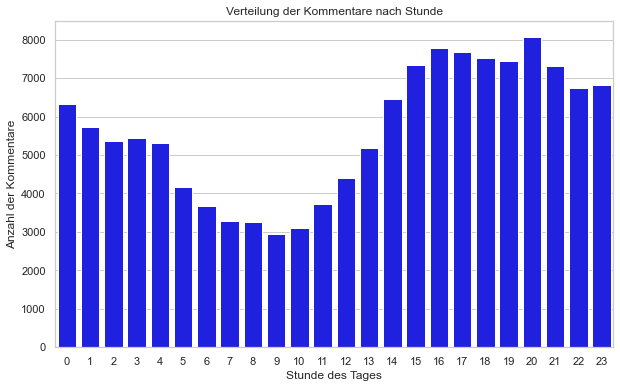

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

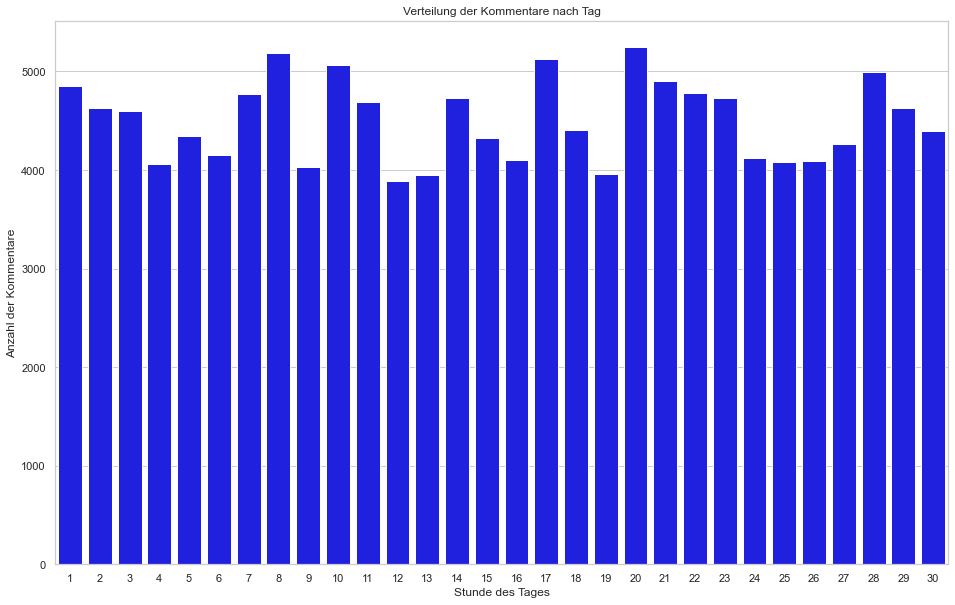

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Years

In [51]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [52]:
df['created_year'].unique()

array([2022])

In [53]:
 df[pd.isna(df['created_day'])]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable,created_hour,created_day,created_year


# Gilded

0    135076
1        48
2         1
3         1
Name: gilded, dtype: int64


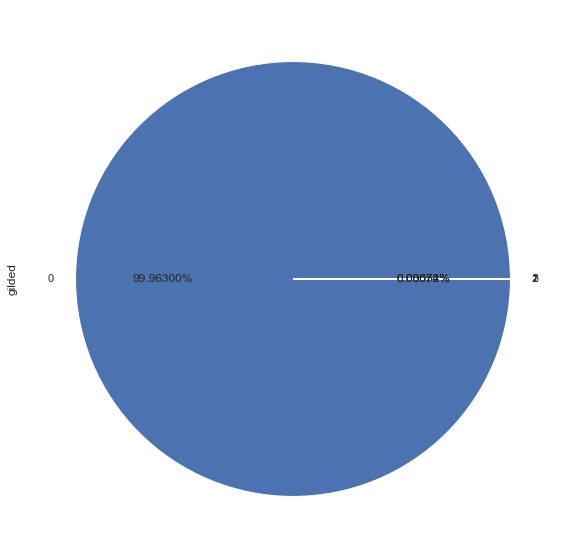

In [54]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["gilded"].value_counts())

In [55]:
df['gilded'] = df['gilded'].replace(0,"0")
df['gilded'] = df['gilded'].replace(1,"1")
df['gilded'] = df['gilded'].replace(2,"2")
df['gilded'] = df['gilded'].replace(3,"3")

0    135076
1        48
2         1
3         1
Name: gilded, dtype: int64


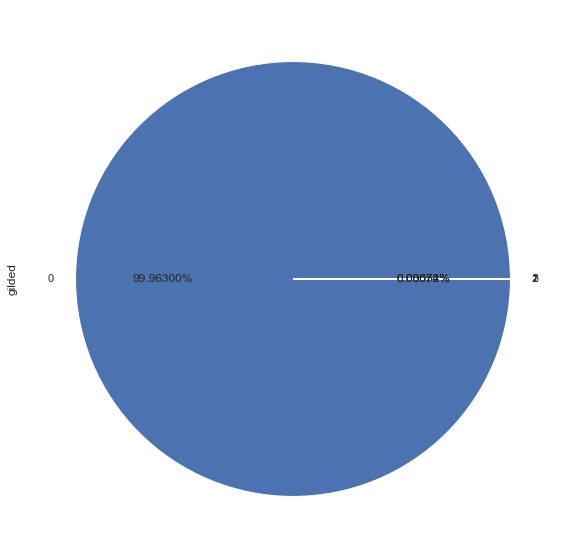

In [56]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["gilded"].value_counts())

In [57]:
df["gilded"].unique()

array(['0', '1', '2', '3'], dtype=object)

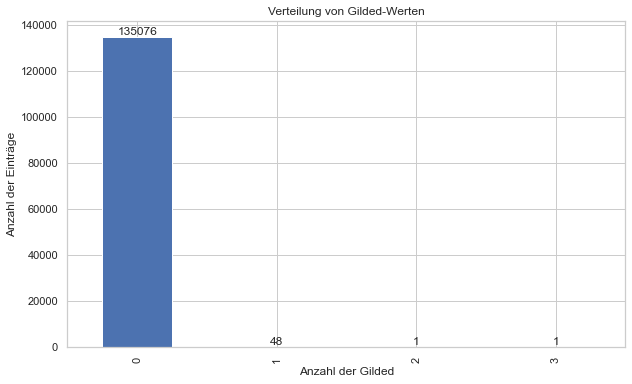

In [58]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Distinguished

In [59]:
df['distinguished'].fillna('0', inplace=True)

0    135126
Name: distinguished, dtype: int64


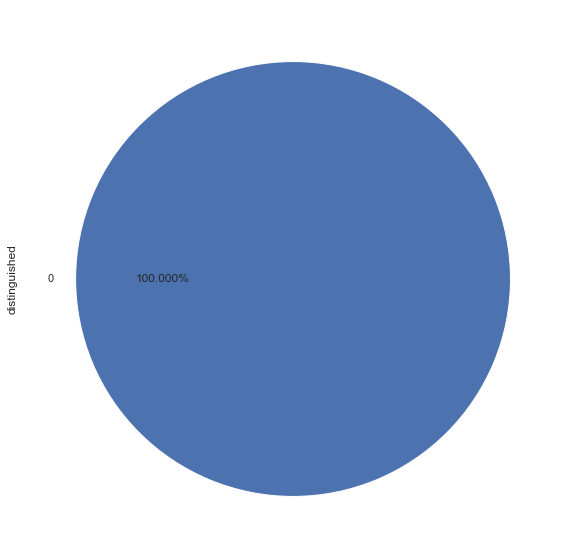

In [60]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [61]:
df["distinguished"].unique()

array(['0'], dtype=object)

# Edited

In [62]:
df["edited"].unique()

array(['1667261268.0', 'False', '1667264057.0', ..., '1669851958.0',
       '1669851917.0', '1669853013.0'], dtype=object)

In [63]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111.1', "1")
df['edited'] = df['edited'].replace('False', "0")

0    130483
1      4643
Name: edited, dtype: int64


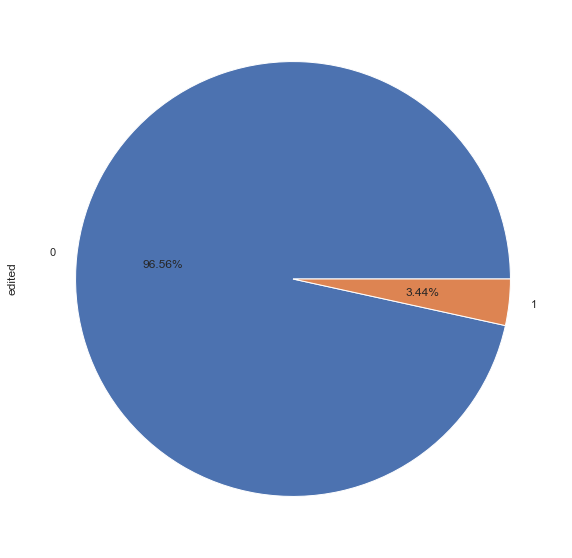

In [64]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [65]:
df[df['edited'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable,created_hour,created_day,created_year


# Score

In [66]:
df["score"].value_counts()

 1       47469
 2       19412
 3       10792
 0        7039
 4        5048
         ...  
 412         1
 684         1
 1694        1
-63          1
 659         1
Name: score, Length: 851, dtype: int64

In [67]:
df['score'] = df["score"].astype(int)

In [68]:
df["score"].mean()

11.027130234003819

In [69]:
df.isnull().sum() 

all_awardings                           0
archived                                0
associated_award                   135126
author                                  0
author_created_utc                  18847
author_flair_background_color      135126
author_flair_css_class             135126
author_flair_richtext               18617
author_flair_template_id           135126
author_flair_text                       0
author_flair_text_color            116509
author_flair_type                   18617
author_fullname                     18617
author_patreon_flair                18617
author_premium                      18617
body                                    0
can_gild                                0
collapsed                               0
collapsed_because_crowd_control    135126
collapsed_reason                   132864
collapsed_reason_code              116602
comment_type                       135126
controversiality                        0
created_utc                       

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135126 entries, 0 to 145576
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   all_awardings                    135126 non-null  object        
 1   archived                         135126 non-null  bool          
 2   associated_award                 0 non-null       float64       
 3   author                           135126 non-null  object        
 4   author_created_utc               116279 non-null  float64       
 5   author_flair_background_color    0 non-null       float64       
 6   author_flair_css_class           0 non-null       float64       
 7   author_flair_richtext            116509 non-null  object        
 8   author_flair_template_id         0 non-null       float64       
 9   author_flair_text                135126 non-null  object        
 10  author_flair_text_color          18617 non-n

# Two Feature Analyses

# Hours vs Score

<AxesSubplot:xlabel='created_hour', ylabel='score'>

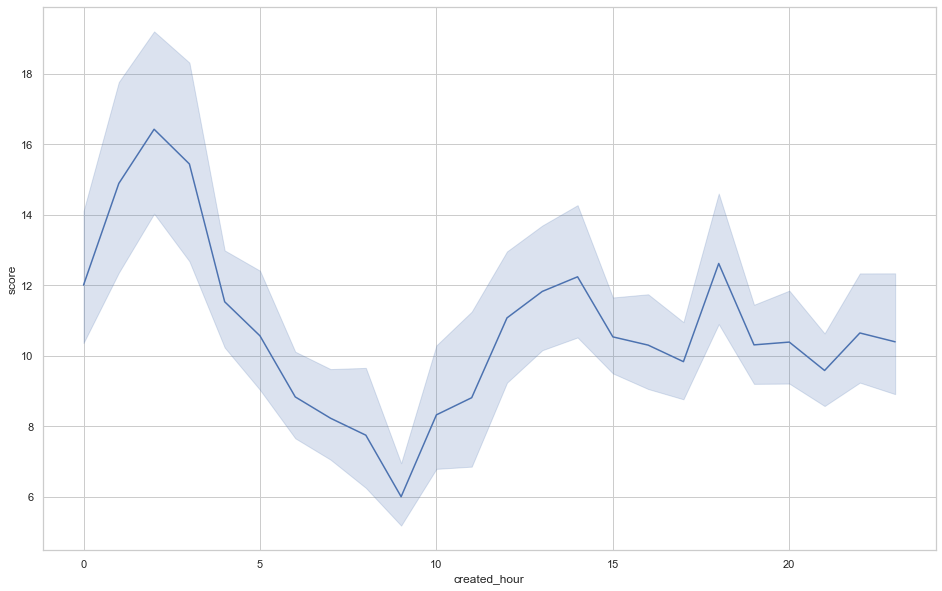

In [71]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Day vs Score

<AxesSubplot:xlabel='created_day', ylabel='score'>

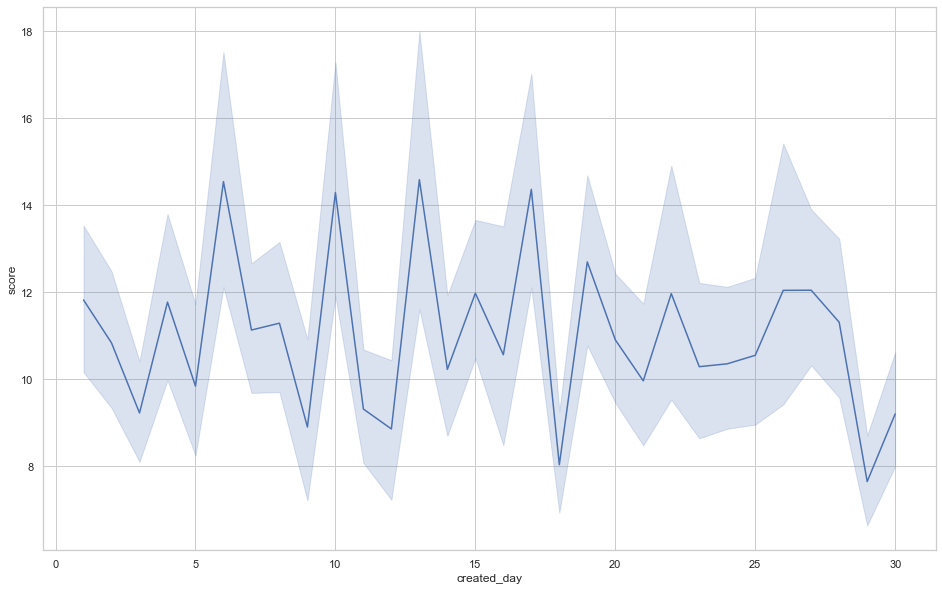

In [72]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

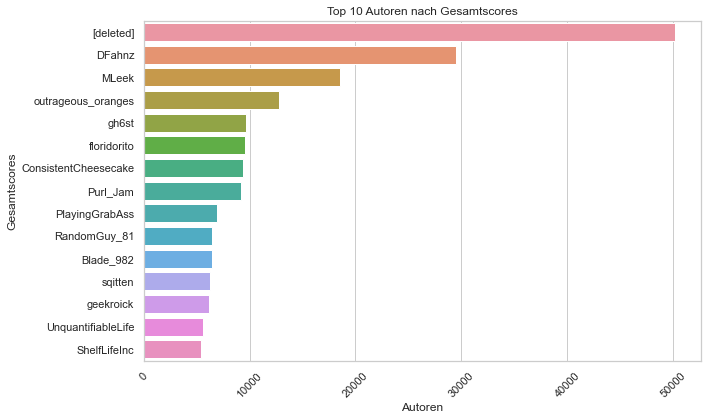

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne Deleted

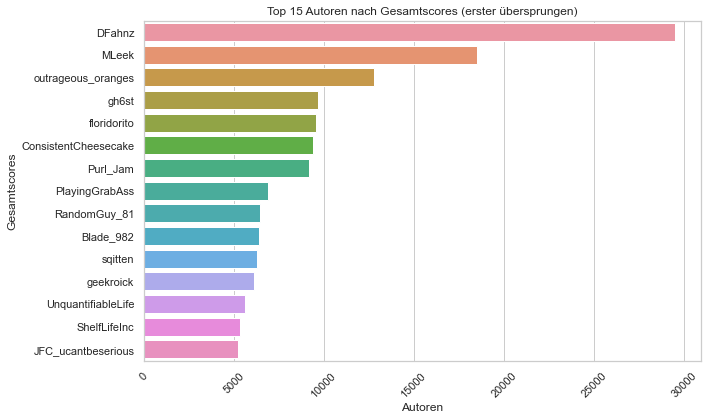

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
df.columns

Index(['all_awardings', 'archived', 'associated_award', 'author',
       'author_created_utc', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'body', 'can_gild',
       'collapsed', 'collapsed_because_crowd_control', 'collapsed_reason',
       'collapsed_reason_code', 'comment_type', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'locked', 'name', 'no_follow', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'score_hidden', 'send_replies',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'top_awarded_type', 'total_awards_received',
       'treatment_tags', 'unrepliable_reason', 'author_cakeday', 'editable',
       'created_ho

# Column removing

In [76]:
df=df.drop(["author_created_utc","author_flair_richtext","author_flair_template_id","author_flair_text_color","author_flair_type","author_fullname","author_patreon_flair","can_gild","gildings","is_submitter","no_follow","subreddit_name_prefixed","author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","permalink"], axis = 1)

In [77]:
df=df.drop(["author_flair_background_color","author_flair_text","collapsed","collapsed_reason","send_replies"], axis = 1)

In [78]:
df=df.drop(["all_awardings","associated_award","author_premium","collapsed_because_crowd_control","locked","total_awards_received"], axis = 1)

In [79]:
df=df.drop(["archived","collapsed_reason_code","comment_type","top_awarded_type","treatment_tags","unrepliable_reason","editable"], axis = 1)

In [80]:
df=df.drop(["name","score_hidden"], axis = 1)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135126 entries, 0 to 145576
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   author            135126 non-null  object        
 1   body              135126 non-null  object        
 2   controversiality  135126 non-null  object        
 3   created_utc       135126 non-null  datetime64[ns]
 4   distinguished     135126 non-null  object        
 5   edited            135126 non-null  object        
 6   gilded            135126 non-null  object        
 7   id                135126 non-null  object        
 8   link_id           135126 non-null  object        
 9   parent_id         135126 non-null  object        
 10  score             135126 non-null  int64         
 11  stickied          135126 non-null  object        
 12  created_hour      135126 non-null  int64         
 13  created_day       135126 non-null  int64         
 14  crea

# Row Deleting

# Delet all comments that have NA

In [82]:
df[pd.isna(df['body'])]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [83]:
df.isnull().sum() 

author              0
body                0
controversiality    0
created_utc         0
distinguished       0
edited              0
gilded              0
id                  0
link_id             0
parent_id           0
score               0
stickied            0
created_hour        0
created_day         0
created_year        0
dtype: int64

# Body analyses and Pre processing

[removed]                                                                                                                                                                                                                                                                                                                                            9503
[deleted]                                                                                                                                                                                                                                                                                                                                            6759
Thank you                                                                                                                                                                                                                                                                                                           

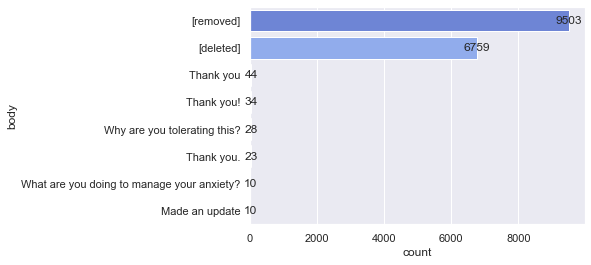

In [84]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben removed comments mehr likes

In [85]:
filtered_df=df[df['body'] == '[removed]']

In [86]:
filtered_df

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
9,[deleted],[removed],0,2022-11-01 00:04:58,0,0,0,iukcp2j,t3_yiq5va,t3_yiq5va,1,0,0,1,2022
17,[deleted],[removed],0,2022-11-01 00:07:38,0,0,0,iukd1aj,t3_yhwtio,t3_yhwtio,0,0,0,1,2022
18,[deleted],[removed],0,2022-11-01 00:08:07,0,0,0,iukd3kg,t3_yin54s,t3_yin54s,1,0,0,1,2022
74,[deleted],[removed],0,2022-11-01 00:31:16,0,0,0,iukg1sf,t3_yigy1d,t3_yigy1d,1,0,0,1,2022
89,[deleted],[removed],0,2022-11-01 00:37:01,0,0,0,iukgsi3,t3_yitv00,t1_iukgnzw,-3,0,0,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145305,[deleted],[removed],0,2022-11-30 23:06:47,0,0,0,iyf7lsx,t3_z8ztyn,t3_z8ztyn,1,0,23,30,2022
145398,[deleted],[removed],0,2022-11-30 23:24:27,0,0,0,iyfa0ei,t3_z965j0,t1_iyf6lqa,1,0,23,30,2022
145473,[deleted],[removed],0,2022-11-30 23:38:01,0,0,0,iyfbtdo,t3_z8tw2z,t1_iydwpbe,1,0,23,30,2022
145544,[deleted],[removed],0,2022-11-30 23:53:30,0,0,0,iyfdu18,t3_z9490k,t3_z9490k,1,0,23,30,2022


In [87]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,9503.000000,9503.000000,9503.000000,9503.0
mean,1.359465,12.465011,14.963485,2022.0
std,13.448351,7.138290,8.797174,0.0
min,-121.000000,0.000000,1.000000,2022.0
25%,1.000000,6.000000,7.000000,2022.0
50%,1.000000,14.000000,15.000000,2022.0
75%,1.000000,19.000000,22.000000,2022.0
max,818.000000,23.000000,30.000000,2022.0


Text(0.5, 1.0, 'Histogramm der Scores')

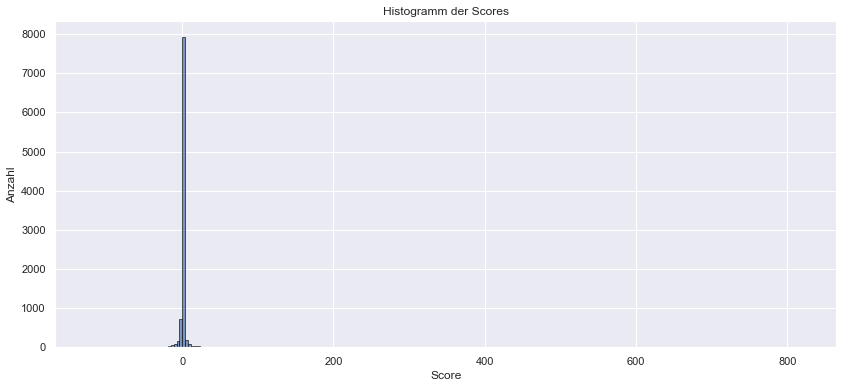

In [88]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

removed Kommentare löschen

In [89]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                            6759
Thank you                                                                                                                                                                                                                                                                                                                                              44
Thank you!                                                                                                                                                                                                                                                                                                          

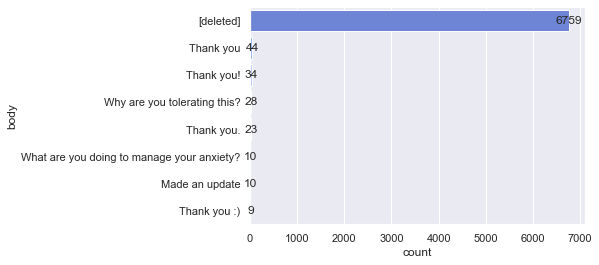

In [90]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben deleted comments mehr likes

In [91]:
filtered_df_del=df[df['body'] == '[deleted]']
filtered_df_del

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
33,[deleted],[deleted],0,2022-11-01 00:16:09,0,1,0,iuke42m,t3_yhy0o4,t1_iujkx6u,0,0,0,1,2022
109,[deleted],[deleted],0,2022-11-01 00:43:30,0,0,0,iukhmp0,t3_yin54s,t3_yin54s,1,0,0,1,2022
110,[deleted],[deleted],0,2022-11-01 00:43:50,0,0,0,iukho6d,t3_yigd3j,t3_yigd3j,-2,0,0,1,2022
129,[deleted],[deleted],0,2022-11-01 00:49:12,0,0,0,iukideb,t3_yirl0c,t3_yirl0c,1,0,0,1,2022
175,[deleted],[deleted],0,2022-11-01 01:04:35,0,0,0,iukkd3k,t3_yigd3j,t3_yigd3j,-13,0,1,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145448,[deleted],[deleted],0,2022-11-30 23:34:37,0,0,0,iyfbcyv,t3_z8jxkn,t3_z8jxkn,1,0,23,30,2022
145451,[deleted],[deleted],0,2022-11-30 23:35:11,0,0,0,iyfbfpc,t3_z8ztyn,t3_z8ztyn,1,0,23,30,2022
145460,[deleted],[deleted],0,2022-11-30 23:36:53,0,0,0,iyfbnxy,t3_z8jxkn,t1_iye0ypj,1,0,23,30,2022
145529,[deleted],[deleted],0,2022-11-30 23:48:37,0,0,0,iyfd6zb,t3_z94gs5,t1_iyf411z,0,0,23,30,2022


In [92]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,6759.000000,6759.000000,6759.000000,6759.0
mean,3.850718,12.949697,14.782660,2022.0
std,34.215670,7.134597,8.832228,0.0
min,-168.000000,0.000000,1.000000,2022.0
25%,1.000000,6.000000,7.000000,2022.0
50%,1.000000,15.000000,14.000000,2022.0
75%,2.000000,19.000000,22.000000,2022.0
max,2022.000000,23.000000,30.000000,2022.0


In [93]:
len(filtered_df_del)

6759

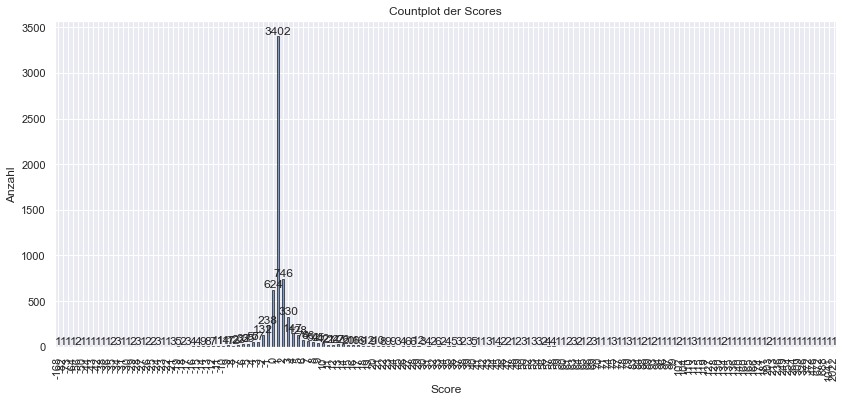

In [94]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')

# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommentare die deleted wurden löschen

In [95]:
df = df[df['body'] != '[deleted]']

Thank you                                                                                                                                                                                                                                                                                                                                            44
Thank you!                                                                                                                                                                                                                                                                                                                                           34
Why are you tolerating this?                                                                                                                                                                                                                                                                                            

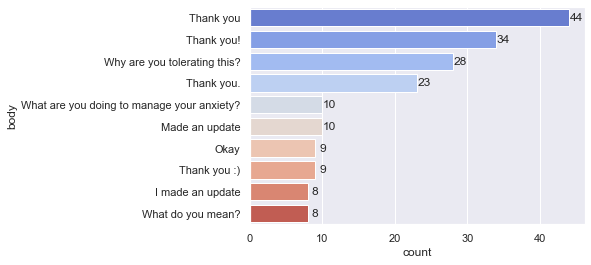

In [96]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:10].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [97]:
df[df['body'] == "."]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


Thank you                                                                                                                                                                                                                                                                                                                                            44
Thank you!                                                                                                                                                                                                                                                                                                                                           34
Why are you tolerating this?                                                                                                                                                                                                                                                                                            

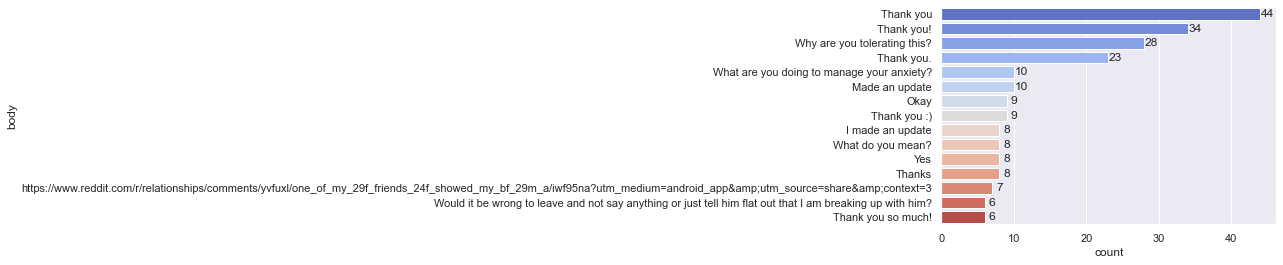

In [98]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:15].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Http und Redditnames removen

# Löschen aller Authoren die AutoModerator sind

In [99]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

# Http und Redditnames removen

In [100]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [101]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [102]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
27800,la-gingerama,r/abusiverelationships,0,2022-11-06 18:48:56,0,0,0,ivbdaac,t3_ynqj5s,t3_ynqj5s,1,0,18,6,2022
125827,ComradeRingo,r/avoidantattachment,0,2022-11-26 23:47:27,0,0,0,ixwq0ep,t3_z58fo6,t3_z58fo6,2,0,23,26,2022


In [103]:
df = df.drop(selected_sub_men_two.index)

In [104]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [105]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [106]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
107361,erisexlibris,https://youtu.be/uxU_ObnOWL4,0,2022-11-22 23:10:05,0,0,0,ixf15r6,t3_z22fm4,t3_z22fm4,1,0,23,22,2022


In [107]:
df = df.drop(selected_rows_2.index)

In [108]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
24209,howyallare,https://www.reddit.com/r/relationships/comment...,0,2022-11-05 23:26:09,0,0,0,iv7rnn9,t3_ym5v0e,t1_iv7rc31,1,0,23,5,2022
24215,howyallare,https://www.reddit.com/r/relationship_advice/c...,0,2022-11-05 23:26:46,0,0,0,iv7rqqn,t3_ym5v0e,t1_iv7rc31,1,0,23,5,2022
24225,howyallare,https://www.reddit.com/r/relationships/comment...,0,2022-11-05 23:28:44,0,0,0,iv7s0kz,t3_ym5v0e,t1_iv7rc31,1,0,23,5,2022
39286,NoPublic6643,https://www.reddit.com/r/relationships/comment...,0,2022-11-08 22:53:15,0,0,0,ivlz67j,t3_yq18t8,t3_yq18t8,0,0,22,8,2022
62389,od_sparkles,https://www.reddit.com/r/FemaleDatingStrategy/...,0,2022-11-13 21:38:36,0,0,0,iw90nhm,t3_yu4rxk,t3_yu4rxk,1,0,21,13,2022
69499,EratosvOnKrete,https://www.reddit.com/r/relationships/comment...,0,2022-11-15 07:51:19,0,0,0,iwfp1hr,t3_yvfuxl,t1_iwfb4er,4,0,7,15,2022
69503,EratosvOnKrete,https://www.reddit.com/r/relationships/comment...,0,2022-11-15 07:52:09,0,0,0,iwfp3p5,t3_yvfuxl,t1_iwf7rn5,2,0,7,15,2022
69514,EratosvOnKrete,https://www.reddit.com/r/relationships/comment...,0,2022-11-15 07:57:10,0,0,0,iwfpghp,t3_yvfuxl,t1_iwf3fub,3,0,7,15,2022
69525,EratosvOnKrete,https://www.reddit.com/r/relationships/comment...,0,2022-11-15 08:01:12,0,0,0,iwfpqqs,t3_yvfuxl,t1_iwenvcb,3,0,8,15,2022
69528,EratosvOnKrete,https://www.reddit.com/r/relationships/comment...,0,2022-11-15 08:02:04,0,0,0,iwfpt08,t3_yvfuxl,t1_iwfo6cz,2,0,8,15,2022


In [109]:
df.drop(url_only_rows.index, inplace=True)

# Delete Bots

In [110]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows 

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [111]:
#Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Lösche Zeilen, in denen die Spalte 'body' mit 'Helper bot' beginnt
df = df[~df['body'].str.startswith('Helper bot')]

In [112]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_95778/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1968,moonhalos,To me it kind of sounds like this guy won’t go...,0,2022-11-01 11:22:52,0,0,0,ium1jxq,t3_yiuhck,t1_iulv9az,4,0,11,1,2022
6118,apathetic-abyss,"Oh honey, grow up and move on. Do you honestly...",0,2022-11-02 03:28:25,0,0,0,iupus88,t3_yjtd37,t1_iupucbo,2,0,3,2,2022
6300,apathetic-abyss,"This is either a bot, or a serious case of bor...",0,2022-11-02 04:30:47,0,0,0,iuq1cr0,t3_yjtd37,t1_iupw57g,2,0,4,2,2022
7832,Unemployed_Fisherman,I agree it would be more likely. This is what ...,0,2022-11-02 15:18:48,0,1,0,iurpnzk,t3_yk641m,t1_iurmz93,1,0,15,2,2022
21557,InsufficientChimp,haha I swear I'm not a bot or anything 🤖,1,2022-11-05 12:13:18,0,0,0,iv588jd,t3_ympthb,t1_iv57vfd,0,0,12,5,2022
24035,-TheDayITriedToLive-,"Thanks for the heads up. I have tagged them ""b...",0,2022-11-05 22:41:12,0,0,0,iv7lgzp,t3_yn3mar,t1_iv7al2n,3,0,22,5,2022
28630,Issamelissa84,And he's bot even really trying to cover his t...,0,2022-11-06 22:45:38,0,0,0,ivcdpfg,t3_ynqj5s,t1_ivcc4c1,2,0,22,6,2022
31558,Hornedmarten,Im kinda suprised no one else is pointing this...,0,2022-11-07 14:33:22,0,0,0,ivf1pdu,t3_yoem70,t3_yoem70,1,0,14,7,2022
48957,liss2458,It reads like very bad stream of consciousness...,0,2022-11-10 22:35:16,0,0,0,ivvj6o8,t3_yrhsyt,t1_ivv8oek,11,0,22,10,2022
49663,troubleman8788,This is ridiculous I can't even copy and paste...,0,2022-11-11 01:20:56,0,0,0,ivw52md,t3_yrwztw,t1_ivw1xte,1,0,1,11,2022


In [113]:
bot_in_body_rows["body"].iloc[0]

'To me it kind of sounds like this guy won’t go away. She said she’s done, he said “well I’m not”. But that’s not really how it works.\n\nTo me it sounds like he’s wondering why his wife bot is now being defective and wants things to go back to the status quo of him being happy and oblivious and her being miserable, as he sees nothing wrong with this.\n\nThis guy suuuuuuucks'

In [114]:
df[df['body'].str.contains("bloop", case=False, regex=True)]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [115]:
df[df['body'].str.contains("bleep", case=False, regex=True)]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [116]:
df[df['author'].str.contains("kelvin_bot", case=False, regex=True)]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [117]:
df_bot=pd.read_csv("bot_names.csv")
df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [118]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)
df_check_bot

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
6,Anonymousredditor009,Gotcha. Is this something I should text her ab...,0,2022-11-01 00:02:45,0,0,0,iukcewj,t3_yhy0o4,t1_iukb8p0,2,0,0,1,2022
61,Anonymousredditor009,got it thanks!,0,2022-11-01 00:24:57,0,0,0,iukf8g9,t3_yhy0o4,t1_iukcs9j,2,0,0,1,2022
216,Endless_Juice,I mean it's not like he didn't have an interes...,0,2022-11-01 01:14:00,0,0,0,iuklk4x,t3_yiqvxx,t1_iuk2r5g,91,0,1,1,2022
274,Okay_Face,You're reasonable to be surprised that a man w...,1,2022-11-01 01:23:44,0,0,0,iukmt58,t3_yiqvxx,t3_yiqvxx,9,0,1,1,2022
415,Little_Conflict_6489,And call the police. Assault needs to be repor...,0,2022-11-01 01:53:18,0,0,0,iukqlwd,t3_yiqjj1,t1_iuk1jd4,9,0,1,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145436,exclaim_bot,"&gt;Fixed, thanks!\n\nYou're welcome!",0,2022-11-30 23:32:45,0,0,0,iyfb45n,t3_z965j0,t1_iyfb338,0,0,23,30,2022
145461,EpitaFelis,You said there is a possibility for forgivenes...,0,2022-11-30 23:36:54,0,0,0,iyfbnzx,t3_z8dyss,t3_z8dyss,2,0,23,30,2022
145543,EpitaFelis,It makes sense to me because I tried being pol...,0,2022-11-30 23:53:06,0,0,0,iyfds85,t3_z8dyss,t1_iyep7cm,3,0,23,30,2022
145569,sirharryflashman,Stop answering the phone! Tell your mom you ca...,0,2022-11-30 23:59:07,0,0,0,iyfek4r,t3_z90kx9,t3_z90kx9,3,0,23,30,2022


In [119]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
10720,exclaim_bot,&gt;Thank you!\n\nYou're welcome!,0,2022-11-03 01:38:48,0,0,0,iuuas15,t3_yjux5p,t1_iuuacv1,1,0,1,3,2022
24697,notarobot4932,Apparently she does all the mental labor though,0,2022-11-06 01:35:55,0,0,0,iv89aas,t3_yna456,t1_iv885w1,13,0,1,6,2022
24698,notarobot4932,"Oh fuck no. OP, IGNORE ANYTHING BY ESTHER PERE...",0,2022-11-06 01:36:48,0,0,0,iv89en5,t3_yna456,t1_iv83rgl,2,0,1,6,2022
24722,notarobot4932,"If you look in the comments, there are some po...",0,2022-11-06 01:40:56,0,0,0,iv89ygs,t3_yna456,t1_iv89tb0,5,0,1,6,2022
31343,bot_bot_bot,This sucks. \nYou have a very reasonable line...,0,2022-11-07 13:51:00,0,0,0,ivew57v,t3_yokvxn,t3_yokvxn,1,0,13,7,2022
41909,bot_bot_bot,&gt; He went on to say that he wouldn’t be goi...,0,2022-11-09 16:21:59,0,0,0,ivp5iat,t3_yqk2yb,t3_yqk2yb,3,0,16,9,2022
41919,bot_bot_bot,"This is who he is, I'd be finished with this i...",0,2022-11-09 16:25:03,0,0,0,ivp5z08,t3_yqk2yb,t1_ivowoo4,3,0,16,9,2022
42982,notarobot4932,It's definitely a green flag that he immediate...,0,2022-11-09 20:14:17,0,0,0,ivq5dj3,t3_yqt8ic,t1_ivq49a0,46,0,20,9,2022
43141,notarobot4932,"The question is, was he oblivious or just a do...",0,2022-11-09 20:40:01,0,0,0,ivq9gha,t3_yqt8ic,t1_ivq96v8,1,0,20,9,2022
45326,bot_bot_bot,"You can't fix this, he needs to fix it and he ...",0,2022-11-10 06:26:26,0,0,0,ivsc4cz,t3_yr0blf,t1_ivrm9rt,9,0,6,10,2022


In [120]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ['exclaim_bot']

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben


In [121]:
df_check_bot[df_check_bot['author'].str.contains('Bot')]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
32725,WaterIsWetBot,Water is actually not wet; It makes other mate...,0,2022-11-07 19:06:42,0,0,0,ivg75o0,t3_yowdny,t1_ivg725s,-2,0,19,7,2022
105244,Careful-Bother-4924,How can you be THAT naive? Like... just takin...,0,2022-11-22 15:17:32,0,0,0,ixd2wxr,t3_z1tljl,t3_z1tljl,13,0,15,22,2022
116406,Careful-Bother-4924,Your bf sounds sketchy as hell. Lots of red fl...,0,2022-11-24 20:47:11,0,0,0,ixnlwhk,t3_z3tyf1,t3_z3tyf1,37,0,20,24,2022


In [122]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ['WaterIsWetBot']

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [123]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Filtern Sie die Zeilen, die "author" den Wert "alphabet_order_bot" (unabhängig von der Groß- und Kleinschreibung) enthalten
rows_to_remove = df[df['author'].str.contains("alphabet_order_bot", case=False, regex=True)]

# Löschen Sie die ausgewählten Zeilen aus dem DataFrame
df = df.drop(rows_to_remove.index)

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, in denen "author" den Wert "alphabet_order_bot" enthält

# NLP Deleting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("relationship_22_comments_EDA_clean.csv")

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118840 entries, 0 to 145576
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   author            118840 non-null  object        
 1   body              118840 non-null  object        
 2   controversiality  118840 non-null  object        
 3   created_utc       118840 non-null  datetime64[ns]
 4   distinguished     118840 non-null  object        
 5   edited            118840 non-null  object        
 6   gilded            118840 non-null  object        
 7   id                118840 non-null  object        
 8   link_id           118840 non-null  object        
 9   parent_id         118840 non-null  object        
 10  score             118840 non-null  int64         
 11  stickied          118840 non-null  object        
 12  created_hour      118840 non-null  int64         
 13  created_day       118840 non-null  int64         
 14  crea

In [126]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [127]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0       Sorry if it sounded superficial, I was really ...   
1       She's not even your GF, just a girl you're "se...   
2                               What habits specifically?   
3       She has at most a communication issue, that do...   
4       Yes, only men refuse to admit when they are wr...   
...                                                   ...   
145572  Just confess you read it and let the arguing b...   
145573  As a child of two parents who absolutely shoul...   
145574  What i think would help you most: 1. Block you...   
145575  Write her a detailed letter, and then read it ...   
145576  People always try to be with a “crazy” girl or...   

                                               clean_text  
0       Sorry if it sounded superficial I was really a...  
1       She s not even your GF just a girl you re seei...  
2                                What habits specifically  
3       She has at most a c

In [128]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [129]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
3073,redditingatwork23,,0,2022-11-01 16:07:48,0,0,0,iun27pi,t3_yj7yum,t1_iumdddr,1,0,16,1,2022,,0
13098,Swimming-Connection8,:(,0,2022-11-03 15:37:25,0,0,0,iuwmi2y,t3_yl5n7v,t1_iuwluml,2,0,15,3,2022,,0
39491,Kingcali707,𝕴 𝖉𝖊𝖋𝖎𝖓𝖎𝖙𝖊𝖑𝖞 𝖍𝖆𝖙𝖊 𝖙𝖔 𝖘𝖆𝖞 𝖎𝖙 𝖇𝖊𝖈𝖆𝖚𝖘𝖊 𝕴’𝖒 𝖆 𝖌𝖚𝖞 ...,0,2022-11-08 23:43:14,0,0,0,ivm67m2,t3_ypswfh,t3_ypswfh,0,0,23,8,2022,,0
40157,Hairy-Signature1119,20 :),0,2022-11-09 03:59:03,0,0,0,ivn3ogy,t3_yq5img,t1_ivn3cgn,1,0,3,9,2022,,0
51743,ImOnlyHereForTheCoC,,0,2022-11-11 14:31:37,0,0,0,ivy7ydj,t3_yrwdnz,t1_ivwu39l,2,0,14,11,2022,,0
55039,VirginSlag,:),0,2022-11-12 03:06:43,0,0,0,iw13ob4,t3_yspgq8,t1_iw0j7u1,1,0,3,12,2022,,0
66603,nevergonnastahp,?,0,2022-11-14 19:17:39,0,0,0,iwd2phn,t3_yjft1z,t1_iv2vf0w,1,0,19,14,2022,,0
67109,Possible-Collection2,9,0,2022-11-14 21:03:27,0,0,0,iwdj0uu,t3_yul4p8,t1_iwdibci,1,0,21,14,2022,,0
93982,msgemstar,100%,0,2022-11-20 13:17:52,0,0,0,ix3e969,t3_yzajf0,t1_ix0qgev,1,0,13,20,2022,,0
110827,SchoolGirlCrush1989,,0,2022-11-23 16:33:15,0,0,0,ixi28ey,t3_z2rwn6,t1_ixhwc9g,4,0,16,23,2022,,0


In [130]:
df = df[df['comment_len'] != 0]

# Final EDA

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118824 entries, 0 to 145576
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   author            118824 non-null  object        
 1   body              118824 non-null  object        
 2   controversiality  118824 non-null  object        
 3   created_utc       118824 non-null  datetime64[ns]
 4   distinguished     118824 non-null  object        
 5   edited            118824 non-null  object        
 6   gilded            118824 non-null  object        
 7   id                118824 non-null  object        
 8   link_id           118824 non-null  object        
 9   parent_id         118824 non-null  object        
 10  score             118824 non-null  int64         
 11  stickied          118824 non-null  object        
 12  created_hour      118824 non-null  int64         
 13  created_day       118824 non-null  int64         
 14  crea

In [132]:
df.head()

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,Archer2795,"Sorry if it sounded superficial, I was really ...",0,2022-11-01 00:00:24,0,1,0,iukc47h,t3_yiriv0,t1_iuk9oz3,1,0,0,1,2022,Sorry if it sounded superficial I was really a...,106
1,floridorito,"She's not even your GF, just a girl you're ""se...",0,2022-11-01 00:00:25,0,0,0,iukc4cm,t3_yisk04,t3_yisk04,115,0,0,1,2022,She s not even your GF just a girl you re seei...,16
2,testingtesting86,What habits specifically?,0,2022-11-01 00:00:26,0,0,0,iukc4d4,t3_yien7t,t1_iukbrnf,1,0,0,1,2022,What habits specifically,3
3,NerdYogi,"She has at most a communication issue, that do...",0,2022-11-01 00:00:54,0,0,0,iukc6ik,t3_yin54s,t1_iuk8hnj,-1,0,0,1,2022,She has at most a communication issue that doe...,71
4,[deleted],"Yes, only men refuse to admit when they are wr...",0,2022-11-01 00:01:23,0,0,0,iukc8rb,t3_yioi0e,t3_yioi0e,0,0,0,1,2022,Yes only men refuse to admit when they are wro...,18


In [133]:
df.tail()

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
145572,Wellwellwelllooky,Just confess you read it and let the arguing b...,0,2022-11-30 23:59:19,0,0,0,iyfekzc,t3_z963kt,t3_z963kt,2,0,23,30,2022,Just confess you read it and let the arguing b...,19
145573,Flower-of-Telperion,As a child of two parents who absolutely shoul...,0,2022-11-30 23:59:27,0,0,0,iyfelnl,t3_z8qpr2,t1_iyd7jc6,1,0,23,30,2022,As a child of two parents who absolutely shoul...,87
145574,Tequila_Heineken,What i think would help you most: 1. Block you...,0,2022-11-30 23:59:34,0,0,0,iyfem6j,t3_z90kx9,t3_z90kx9,2,0,23,30,2022,What i think would help you most . Block your ...,40
145575,103_with_reddit_ref,"Write her a detailed letter, and then read it ...",0,2022-11-30 23:59:43,0,0,0,iyfemwg,t3_z8dqzw,t1_iyb84s6,2,0,23,30,2022,Write her a detailed letter and then read it o...,17
145576,After_Difficulty5459,People always try to be with a “crazy” girl or...,0,2022-11-30 23:59:49,0,0,0,iyfenb6,t3_z7j0ck,t3_z7j0ck,1,0,23,30,2022,People always try to be with a crazy girl or a...,35


# Controversialty

In [140]:
df['controversiality'] = df['controversiality'].replace("0",False)
df['controversiality'] = df['controversiality'].replace("1",True)

False    114948
True       3876
Name: controversiality, dtype: int64


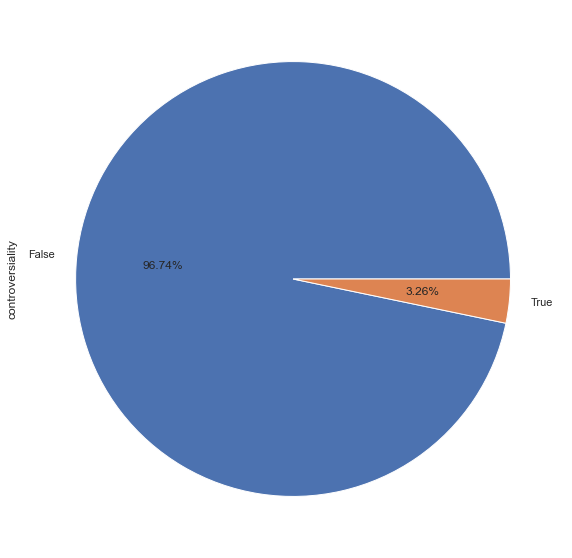

In [141]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [142]:
df['stickied'] = df['stickied'].replace("0",False)

False    118824
Name: stickied, dtype: int64


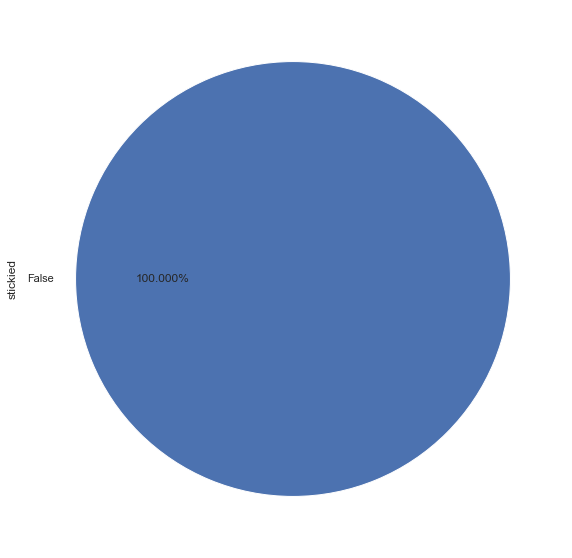

In [143]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["stickied"].value_counts())

# link_id

t3_z4m4ip    722
t3_yr0blf    590
t3_z1zhk2    588
t3_yiqvxx    535
t3_yjt0i0    519
            ... 
t3_yqxrjp      1
t3_yqumyi      1
t3_y58lxt      1
t3_yyr5xt      1
t3_z963kt      1
Name: link_id, Length: 6871, dtype: int64


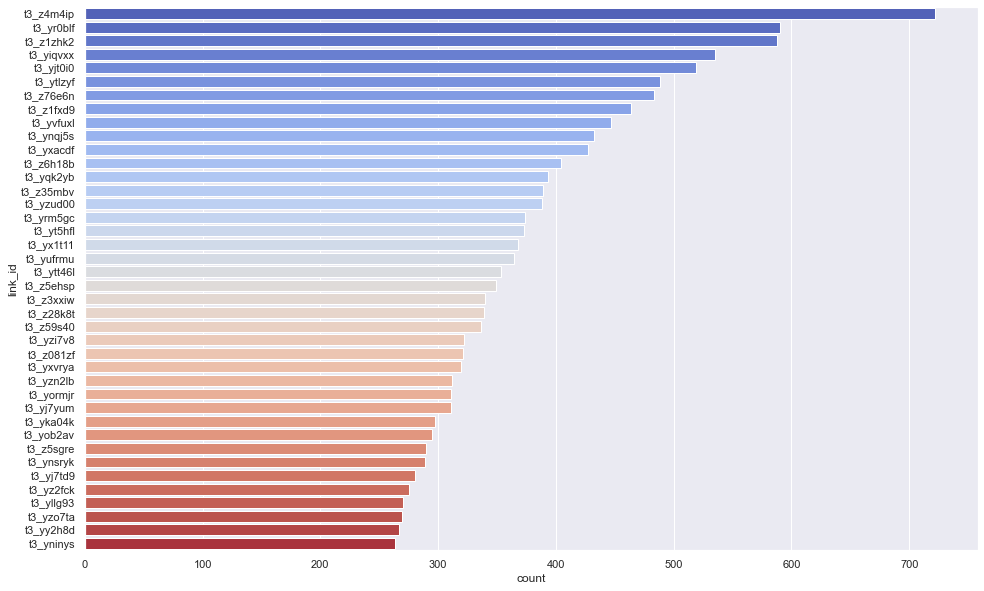

In [144]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [145]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 6871


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

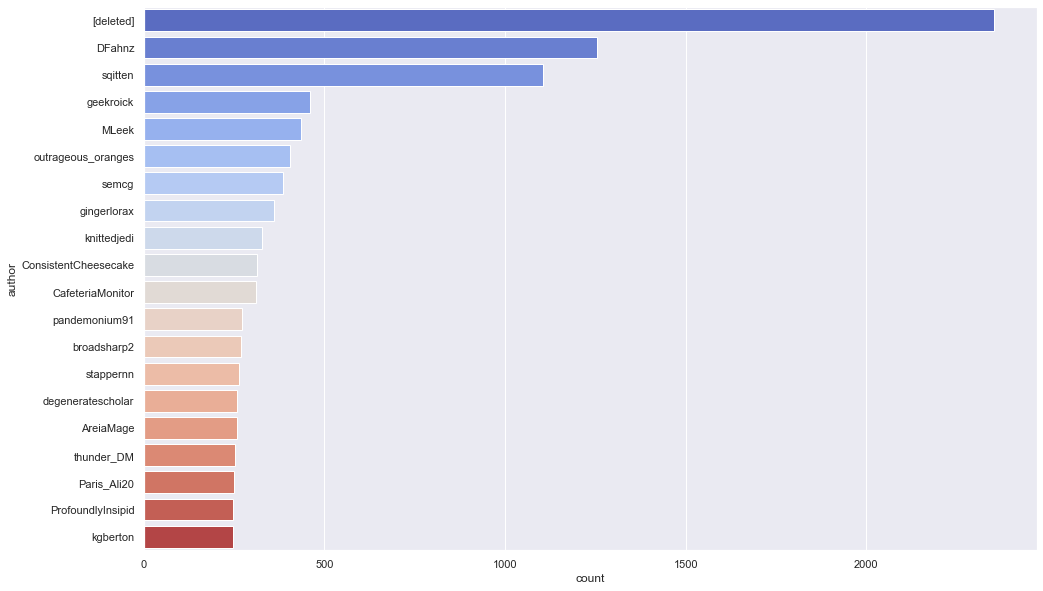

In [146]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

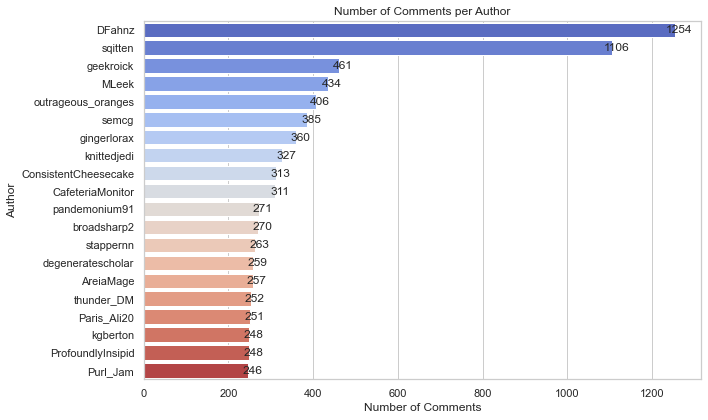

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [148]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 17.29


In [149]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 4.66


In [150]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 25484


# Hours

([<matplotlib.axis.XTick at 0x7f8ea05485e0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

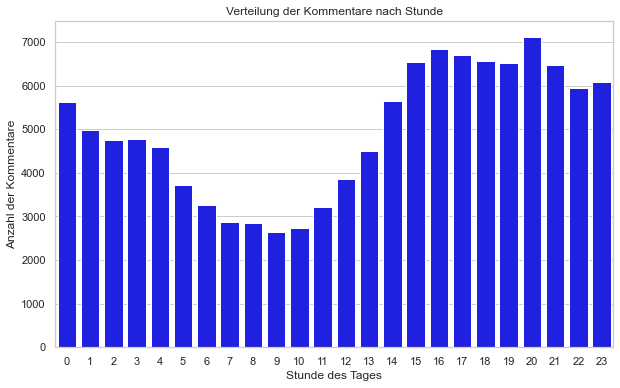

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

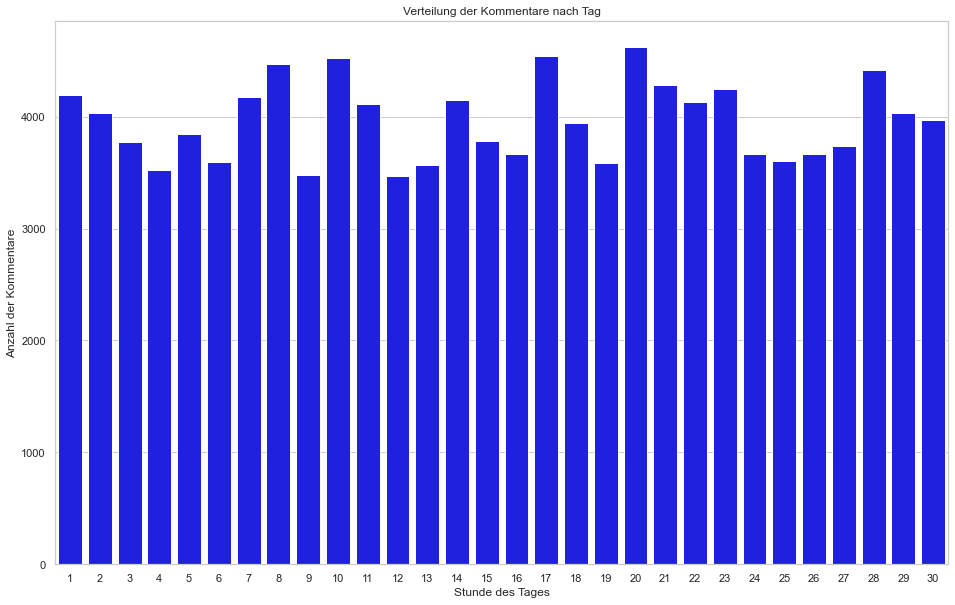

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    118774
1        48
2         1
3         1
Name: gilded, dtype: int64


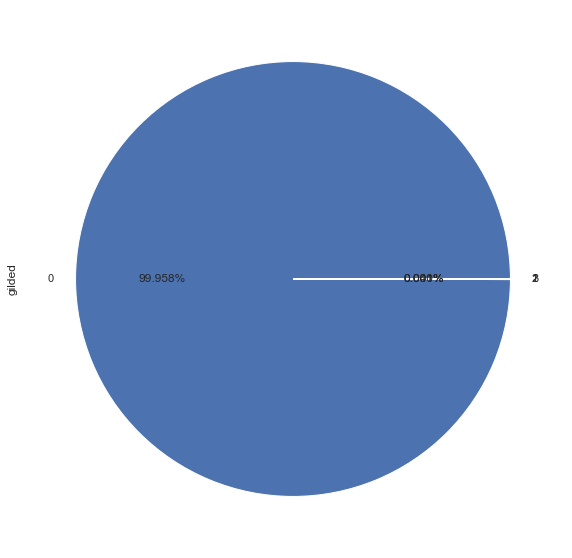

In [153]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguised

In [154]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False    118824
Name: distinguished, dtype: int64


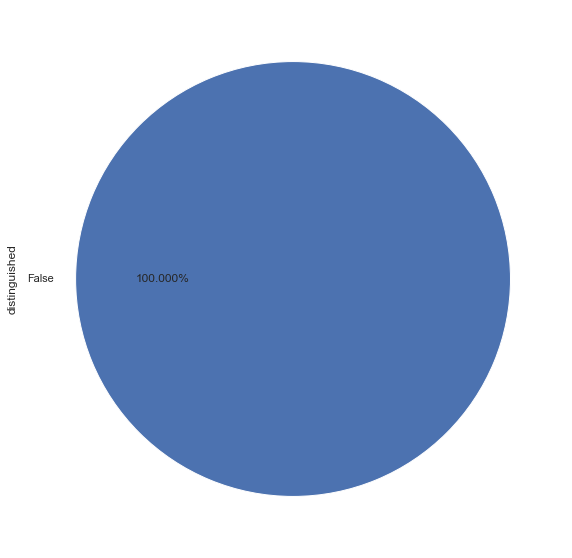

In [155]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [156]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    115048
True       3776
Name: edited, dtype: int64


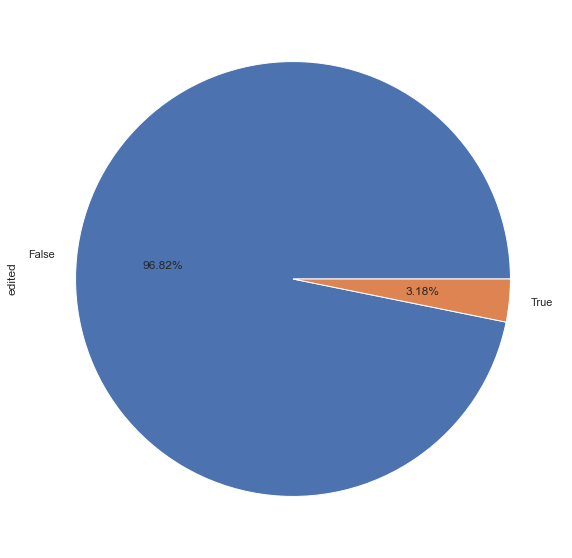

In [157]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [158]:
df["score"].mean()

12.211691240826768

In [159]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
44157,JFC_ucantbeserious,I feel like what you’re really asking here is:...,False,2022-11-10 01:11:40,False,True,2,ivrci2v,t3_yr0blf,t3_yr0blf,4879,False,1,10,2022,I feel like what you re really asking here is ...,191
122073,PlayingGrabAss,Your divorce attorney can tell you everything ...,False,2022-11-26 03:12:45,False,False,0,ixt3g9s,t3_z4vz7s,t3_z4vz7s,4689,False,3,26,2022,Your divorce attorney can tell you everything ...,25
75424,Anonarcissist,Don't get intimate after drinking a lot of win...,False,2022-11-16 18:33:17,False,False,0,iwmcty8,t3_yx1t11,t3_yx1t11,4246,False,18,16,2022,Don t get intimate after drinking a lot of win...,14
107447,Blade_982,He's not unhappy with you. He's unhappy with h...,False,2022-11-22 23:35:10,False,True,1,ixf4g8t,t3_z28k8t,t3_z28k8t,3985,False,23,22,2022,He s not unhappy with you . He s unhappy with ...,216
77291,UnquantifiableLife,"Jesus that was hard to read. Seriously, get aw...",False,2022-11-17 00:55:55,False,False,0,iwnw4ic,t3_yxacdf,t3_yxacdf,3717,False,0,17,2022,Jesus that was hard to read . Seriously get aw...,28
102628,WeirdAl777,Your salary is the least of your worries,False,2022-11-22 01:03:45,False,False,0,ixapy7x,t3_z1fxd9,t3_z1fxd9,3434,False,1,22,2022,Your salary is the least of your worries,8
58913,rach-mtl,Stop talking about things “briefly” and have a...,False,2022-11-13 02:14:06,False,False,0,iw5dh27,t3_ytlzyf,t3_ytlzyf,3343,False,2,13,2022,Stop talking about things briefly and have a f...,11
26703,SoulSprawl,I don't understand people who put up with this...,False,2022-11-06 14:38:57,False,False,0,ivabo30,t3_ynqj5s,t3_ynqj5s,3146,False,14,6,2022,I don t understand people who put up with this...,38
134785,newaxcounr,the only part i want to comment on is chores v...,False,2022-11-28 20:28:20,False,False,0,iy52leb,t3_z76e6n,t3_z76e6n,2791,False,20,28,2022,the only part i want to comment on is chores v...,121
58890,outrageous_oranges,6.5 years together and those are the only 2 di...,False,2022-11-13 02:04:26,False,False,0,iw5c9qj,t3_ytlzyf,t3_ytlzyf,2631,False,2,13,2022,. years together and those are the only discus...,16


In [160]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
79345,__xxii,"Well I may have worded it wrong, but by commit...",False,2022-11-17 13:39:52,False,False,0,iwpv8jn,t3_yxp831,t1_iwpuqv5,-365,False,13,17,2022,Well I may have worded it wrong but by commitm...,64
10826,Itoruna,I can’t leave her permanently. I love her and ...,False,2022-11-03 02:09:16,False,False,0,iuuf2fj,t3_yko0mp,t1_iuu6rh8,-294,False,2,3,2022,I can t leave her permanently . I love her and...,26
70576,Fragrant-Class-3775,It just gets so lonely and depressing being al...,False,2022-11-15 16:03:42,False,False,0,iwh04eb,t3_yw1590,t1_iwgzsmc,-241,False,16,15,2022,It just gets so lonely and depressing being al...,21
129455,alexdelarge11,The main problem is that I would be ok with dr...,False,2022-11-27 20:38:52,False,False,0,iy0hfvg,t3_z6bq16,t1_iy0h1dy,-224,False,20,27,2022,The main problem is that I would be ok with dr...,22
105899,throwRAfriendship_s,He is pretty much my best friend right now. I ...,False,2022-11-22 17:57:04,False,False,0,ixdqrbz,t3_z1zhk2,t1_ixdpyuw,-200,False,17,22,2022,He is pretty much my best friend right now . I...,30
10866,Itoruna,She does love me. She’s done so much for me th...,False,2022-11-03 02:22:48,False,False,0,iuugv62,t3_yko0mp,t1_iuug1it,-191,False,2,3,2022,She does love me . She s done so much for me t...,70
17685,Parking_Homework_296,I have tried to reassure my boyfriend about wh...,False,2022-11-04 15:57:45,False,False,0,iv1h2hj,t3_ym11fu,t1_iv1dsu6,-189,False,15,4,2022,I have tried to reassure my boyfriend about wh...,31
70176,Classic-Hunter-2490,Idk but luckily if they follow me back then I ...,False,2022-11-15 14:19:17,False,False,0,iwglbb0,t3_yvy918,t1_iwgl23x,-174,False,14,15,2022,Idk but luckily if they follow me back then I ...,19
125662,[deleted],I’m not looking for reasons to be mad at all. ...,False,2022-11-26 23:03:49,False,False,0,ixwkhs2,t3_z5ehsp,t1_ixwgu0s,-171,False,23,26,2022,I m not looking for reasons to be mad at all ....,31
17694,Parking_Homework_296,I haven't officially cut ties. I haven't spoke...,False,2022-11-04 16:02:53,False,False,0,iv1hvcj,t3_ym11fu,t1_iv1h9fv,-169,False,16,4,2022,I haven t officially cut ties . I haven t spok...,29


# Score vs Hours on comments

<AxesSubplot:xlabel='created_hour', ylabel='score'>

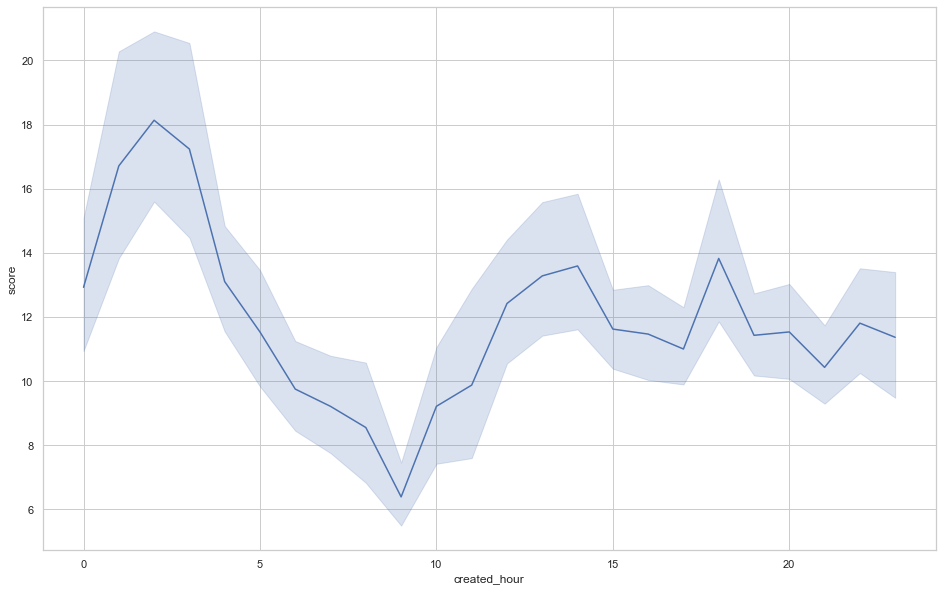

In [161]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score on comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

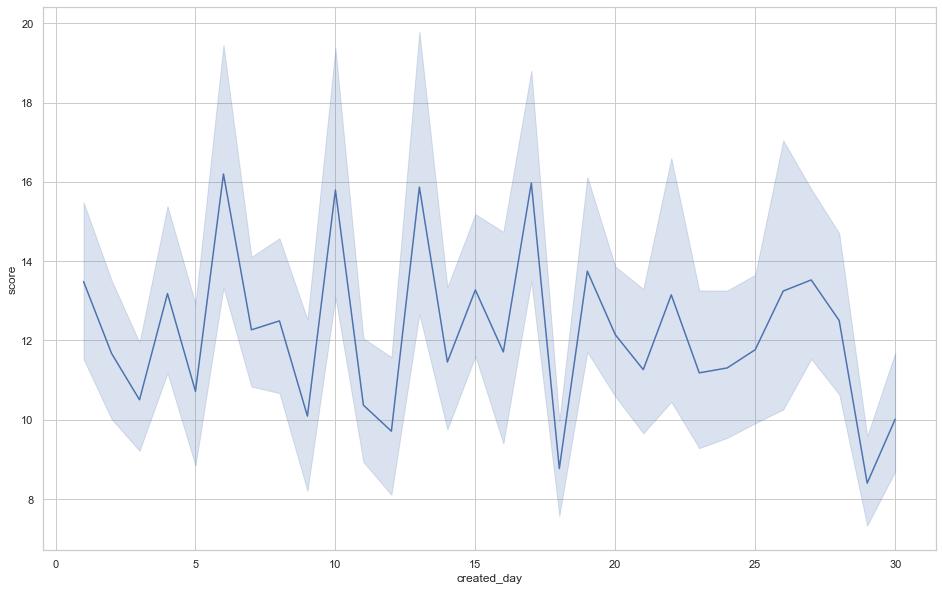

In [162]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which author have the most scores

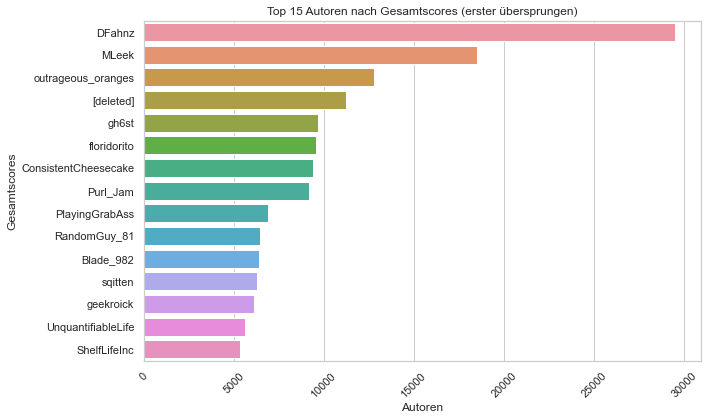

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[0:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

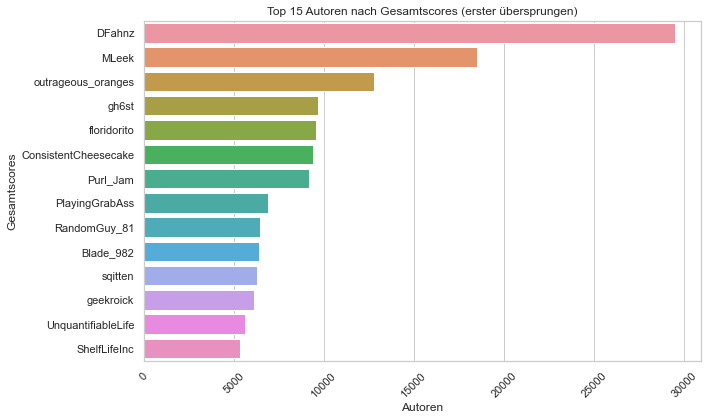

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[0:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Entferne den Autor "[deleted]" aus den Top-Autoren
top_authors = top_authors[top_authors.index != '[deleted]']

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

In [165]:
df.describe()

,score,created_hour,created_day,created_year,comment_len
count,118824.000000,118824.000000,118824.000000,118824.0,118824.000000
mean,12.211691,12.717288,15.555427,2022.0,70.568042
std,70.333456,7.220430,8.645044,0.0,81.163434
min,-365.000000,0.000000,1.000000,2022.0,1.000000
25%,1.000000,6.000000,8.000000,2022.0,22.000000
50%,2.000000,14.000000,16.000000,2022.0,45.000000
75%,6.000000,19.000000,23.000000,2022.0,89.000000
max,4879.000000,23.000000,30.000000,2022.0,1967.000000


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118824 entries, 0 to 145576
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   author            118824 non-null  object        
 1   body              118824 non-null  object        
 2   controversiality  118824 non-null  bool          
 3   created_utc       118824 non-null  datetime64[ns]
 4   distinguished     118824 non-null  bool          
 5   edited            118824 non-null  bool          
 6   gilded            118824 non-null  object        
 7   id                118824 non-null  object        
 8   link_id           118824 non-null  object        
 9   parent_id         118824 non-null  object        
 10  score             118824 non-null  int64         
 11  stickied          118824 non-null  bool          
 12  created_hour      118824 non-null  int64         
 13  created_day       118824 non-null  int64         
 14  crea

# Save cleaned general data

In [167]:
df.to_csv("relationship_22_comments_EDA_clean.csv",index=False,sep=",")

In [168]:
import pandas as pd
test_author=pd.read_csv("relationship_22_comments_EDA_clean.csv",sep=",")
print("Anzahl der Authoren==",test_author['author'].nunique())

Anzahl der Authoren== 25485


In [169]:
test_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118824 entries, 0 to 118823
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            118824 non-null  object
 1   body              118824 non-null  object
 2   controversiality  118824 non-null  bool  
 3   created_utc       118824 non-null  object
 4   distinguished     118824 non-null  bool  
 5   edited            118824 non-null  bool  
 6   gilded            118824 non-null  int64 
 7   id                118824 non-null  object
 8   link_id           118824 non-null  object
 9   parent_id         118824 non-null  object
 10  score             118824 non-null  int64 
 11  stickied          118824 non-null  bool  
 12  created_hour      118824 non-null  int64 
 13  created_day       118824 non-null  int64 
 14  created_year      118824 non-null  int64 
 15  clean_text        118824 non-null  object
 16  comment_len       118824 non-null  int

In [170]:
test_author.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,118824.000000,118824.000000,118824.000000,118824.000000,118824.0,118824.000000
mean,0.000446,12.211691,12.717288,15.555427,2022.0,70.568042
std,0.022653,70.333456,7.220430,8.645044,0.0,81.163434
min,0.000000,-365.000000,0.000000,1.000000,2022.0,1.000000
25%,0.000000,1.000000,6.000000,8.000000,2022.0,22.000000
50%,0.000000,2.000000,14.000000,16.000000,2022.0,45.000000
75%,0.000000,6.000000,19.000000,23.000000,2022.0,89.000000
max,3.000000,4879.000000,23.000000,30.000000,2022.0,1967.000000


False    118824
Name: stickied, dtype: int64


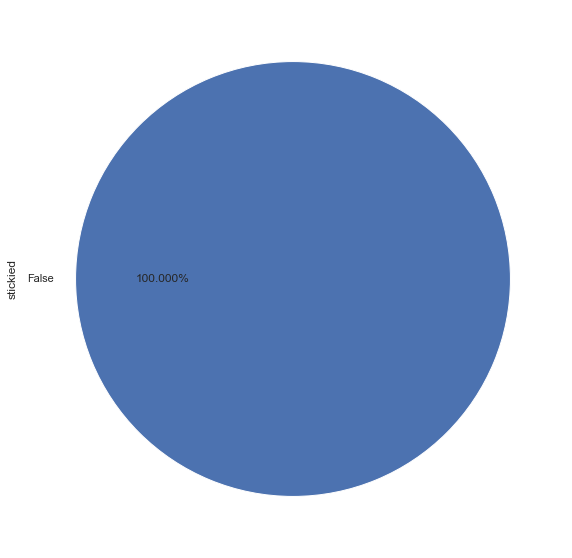

In [171]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
test_author["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(test_author["stickied"].value_counts())

df[df['body'].str.contains("bloop", case=False, regex=True)]
df[df['body'].str.contains("bleep", case=False, regex=True)]
df_check_bot[df_check_bot['author'].str.contains('Bot')]
df = df[df['body'] != '.']

df[df['body'] == '.']
#df = df[df['body'] != '.']
